<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/DC_PC/NGC6822_DC_PC_008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1220, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1220 (delta 96), reused 60 (delta 60), pack-reused 1066
Receiving objects: 100% (1220/1220), 99.97 MiB | 22.24 MiB/s, done.
Resolving deltas: 100% (597/597), done.
Updating files: 100% (138/138), done.


In [ ]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [ ]:
Z = 0.008
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [ ]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [ ]:
file_address = '/content/NGC_6822/Data/final_data_v2.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [ ]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950


In [ ]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [ ]:
X = (df['J-Ks'])
Y = (df['Ks'])

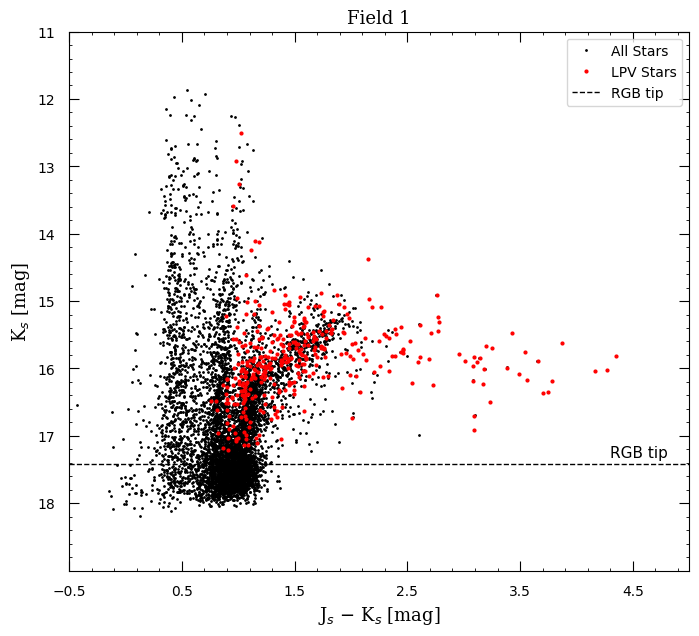

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [ ]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-bmz9u25w
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-bmz9u25w
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 8316e67aa8d5f03931b6aa7743d9d8db596366f4
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2586 sha256=68ee0fc05bf432cdd350b4efb9a881324e94d5373ddf2305f87c4cb8fd4debbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-50mbaqaj/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [ ]:
from AstroDC import AstroDC

In [ ]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 15:03:51 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 15:05:35 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.008,-0.27576,6.60,0.090411,1.085617,0.090,-1.538,3.4426,3.655,0,...,0.008000,8.615,15.439,14.455,13.018,11.206,9.036,6.836,6.174,5.833
1,0.008,-0.27576,6.60,0.099883,1.170130,0.100,-1.528,3.4445,3.695,0,...,0.008000,8.589,15.632,14.442,12.908,11.119,8.966,6.816,6.157,5.819
2,0.008,-0.27576,6.60,0.107315,1.229461,0.107,-1.496,3.4483,3.710,0,...,0.008000,8.510,15.574,14.299,12.724,10.969,8.847,6.745,6.084,5.752
3,0.008,-0.27576,6.60,0.115623,1.289765,0.116,-1.478,3.4506,3.733,0,...,0.008001,8.465,15.618,14.233,12.604,10.872,8.771,6.706,6.046,5.716
4,0.008,-0.27576,6.60,0.120182,1.320514,0.120,-1.478,3.4509,3.751,0,...,0.008000,8.464,15.707,14.244,12.579,10.853,8.757,6.708,6.049,5.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,0.008,-0.27576,10.05,0.947679,2.461264,0.722,3.235,3.5272,0.123,7,...,0.009200,-3.317,4.108,2.200,0.367,-1.192,-2.974,-4.846,-5.882,-6.203
20275,0.008,-0.27576,10.05,0.947679,2.461264,0.713,3.277,3.5212,0.050,7,...,0.009200,-3.423,4.135,2.377,0.595,-1.078,-2.974,-4.972,-6.013,-6.346
20276,0.008,-0.27576,10.05,0.947680,2.461264,0.703,3.308,3.5167,-0.004,8,...,0.007841,-3.501,4.159,2.517,0.773,-0.987,-2.969,-5.065,-6.110,-6.451
20277,0.008,-0.27576,10.05,0.947681,2.461265,0.652,3.342,3.5142,-0.081,8,...,0.007841,-3.585,4.181,2.599,0.865,-0.961,-3.001,-5.159,-6.204,-6.553


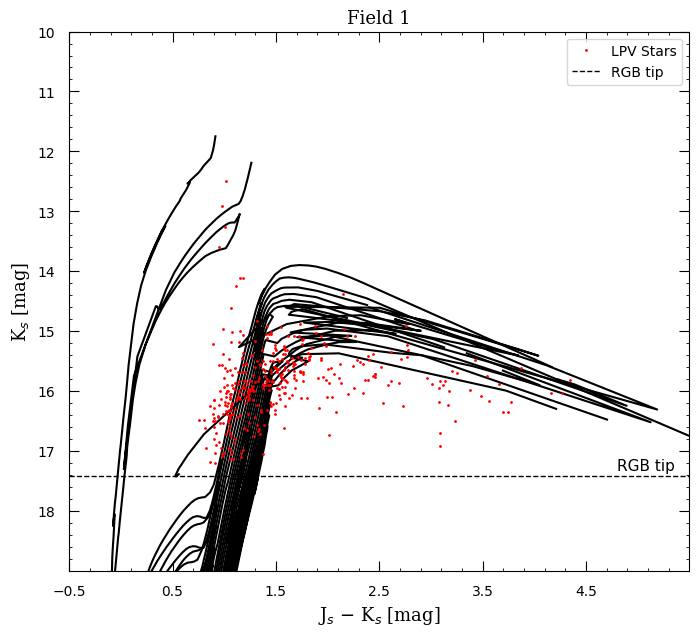

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [ ]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.008,-0.27576,6.60,0.090411,1.085617,0.090,-1.538,3.4426,3.655,0,...,0.008000,8.615,15.439,14.455,13.018,11.206,9.036,6.836,6.174,5.833
1,0.008,-0.27576,6.60,0.099883,1.170130,0.100,-1.528,3.4445,3.695,0,...,0.008000,8.589,15.632,14.442,12.908,11.119,8.966,6.816,6.157,5.819
2,0.008,-0.27576,6.60,0.107315,1.229461,0.107,-1.496,3.4483,3.710,0,...,0.008000,8.510,15.574,14.299,12.724,10.969,8.847,6.745,6.084,5.752
3,0.008,-0.27576,6.60,0.115623,1.289765,0.116,-1.478,3.4506,3.733,0,...,0.008001,8.465,15.618,14.233,12.604,10.872,8.771,6.706,6.046,5.716
4,0.008,-0.27576,6.60,0.120182,1.320514,0.120,-1.478,3.4509,3.751,0,...,0.008000,8.464,15.707,14.244,12.579,10.853,8.757,6.708,6.049,5.719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21015,0.008,-0.27576,10.05,0.947680,2.461264,0.703,3.308,3.5167,-0.004,8,...,0.007841,-3.501,4.159,2.517,0.773,-0.987,-2.969,-5.065,-6.110,-6.451
21016,0.008,-0.27576,10.05,0.947680,2.461264,0.688,3.052,3.5516,0.381,8,...,0.007841,-2.861,4.013,1.777,-0.153,-1.420,-2.749,-4.316,-5.312,-5.595
21017,0.008,-0.27576,10.05,0.947681,2.461265,0.652,3.342,3.5142,-0.081,8,...,0.007841,-3.585,4.181,2.599,0.865,-0.961,-3.001,-5.159,-6.204,-6.553
21018,0.008,-0.27576,10.05,0.947682,2.461265,0.637,3.014,3.5611,0.425,8,...,0.007841,-2.764,3.923,1.626,-0.318,-1.517,-2.704,-4.196,-5.168,-5.439


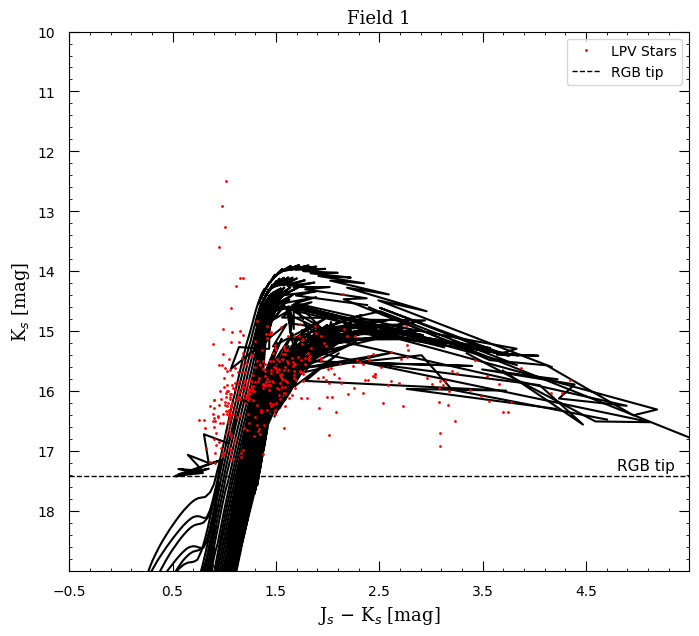

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [ ]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [ ]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

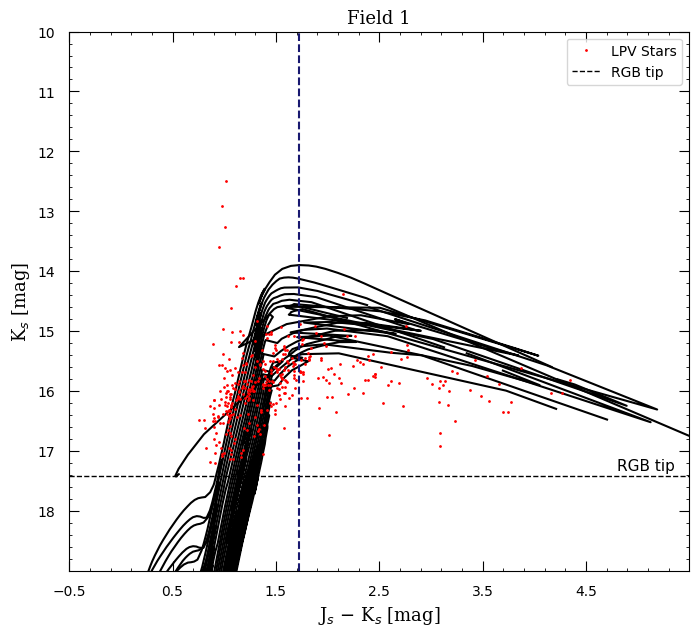

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [ ]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 :
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [ ]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [ ]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 :
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [ ]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.34563450044592114
Slope_O : 0.6998222013010515


Slope : Visualization

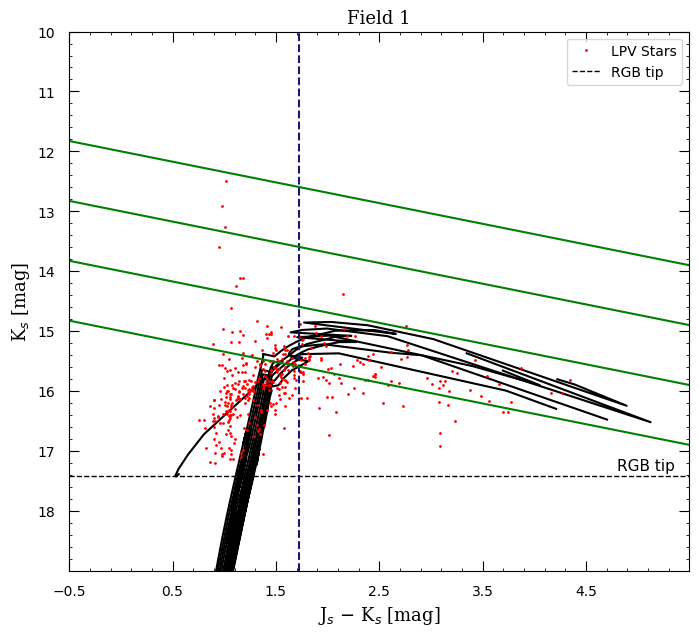

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

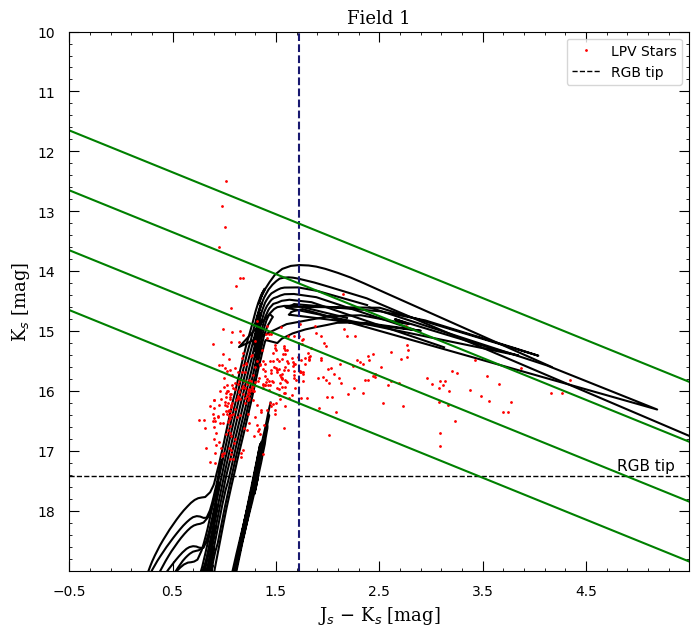

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [ ]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [ ]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

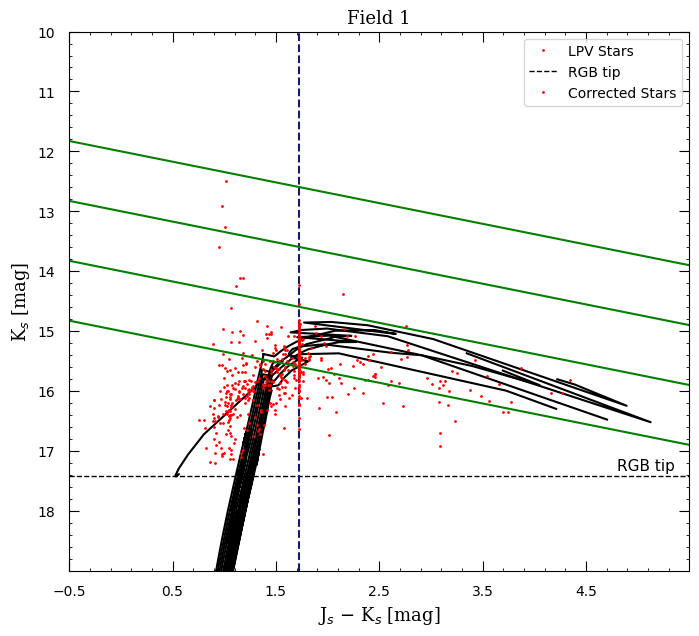

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [ ]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.008,-0.767,-7.575,NaN,-11.767
1,0.008,-0.412,-3.402,-11.767,-11.381
2,0.008,-0.139,-0.298,-11.381,-10.994
3,0.008,-0.346,-2.565,-10.994,-10.608
4,0.008,-0.195,-0.972,-10.608,-10.221
5,0.008,-0.671,-5.838,-10.221,-9.835
6,0.008,-0.200,-1.198,-9.835,-9.448
7,0.008,-0.390,-2.999,-9.448,-9.061
8,0.008,-0.368,-2.796,-9.061,-8.675
9,0.008,-0.307,-2.269,-8.675,-8.288


In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [ ]:
print(f'a: {a}   b: {b}')

a: -0.18   b: -1.258


$Log(M/M_s) = a \times K_s + b$

In [ ]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [ ]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

7
C Star --> 7
8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
17
C Star --> 17
18
O Star --> 18
19
C Star --> 19
20
C Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
C Star --> 24
26
C Star --> 26
27
C Star --> 27
29
C Star --> 29
31
C Star --> 31
32
C Star --> 32
40
C Star --> 40
47
C Star --> 47
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
O Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66
67
C Star --> 67
68
C Star --> 68
69
C Star --> 69
70
C Star --> 70
71
C Star --> 71
72
C Star --> 72
73
C Star --> 73
74
C Star --> 74
75
C Star --> 75
76
C Star --> 76
77
C Star --> 77
78
C Star --> 78
79
C Star --> 79
80
C Star --> 80
81
C Star --> 81
82
C Star --> 82
88


In [ ]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950


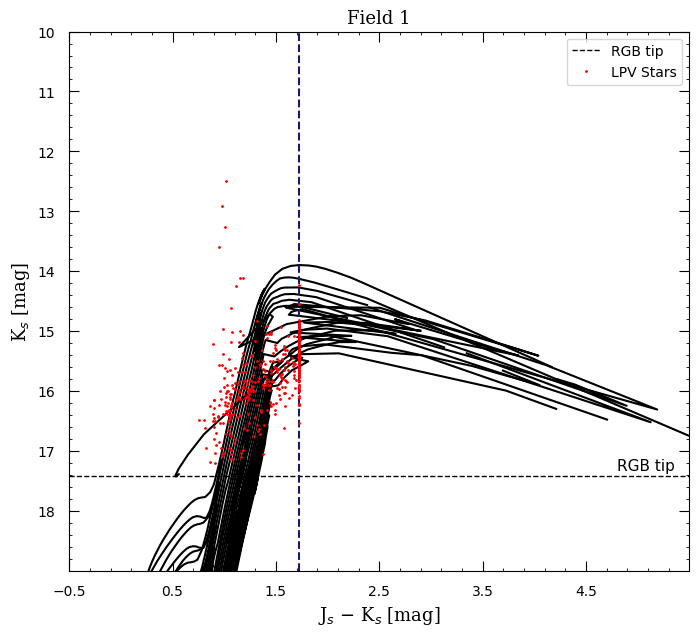

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag'])
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [ ]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [ ]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [ ]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
168,0.008,-0.767,-7.575,NaN,-11.767
169,0.008,-0.412,-3.402,-11.767,-11.381
170,0.008,-0.139,-0.298,-11.381,-10.994
171,0.008,-0.346,-2.565,-10.994,-10.608
172,0.008,-0.195,-0.972,-10.608,-10.221
173,0.008,-0.671,-5.838,-10.221,-9.835
174,0.008,-0.200,-1.198,-9.835,-9.448
175,0.008,-0.390,-2.999,-9.448,-9.061
176,0.008,-0.368,-2.796,-9.061,-8.675
177,0.008,-0.307,-2.269,-8.675,-8.288


In [ ]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.21   b: -1.461


In [ ]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200,0.06313,1.156458
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120,0.06152,1.152179
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200,0.05025,1.122665
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110,0.05830,1.143668
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340,-0.03040,0.932395
...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068,-0.09376,0.805824
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.12220,0.754745
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.99278,9.835128
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.77806,5.998739


(array([ 49., 148., 126.,  43.,   2.,   4.,   1.,   0.,   2.,   1.]),
 array([-1.34800e-01,  1.05000e-03,  1.36900e-01,  2.72750e-01,
         4.08600e-01,  5.44450e-01,  6.80300e-01,  8.16150e-01,
         9.52000e-01,  1.08785e+00,  1.22370e+00]),
 <BarContainer object of 10 artists>)

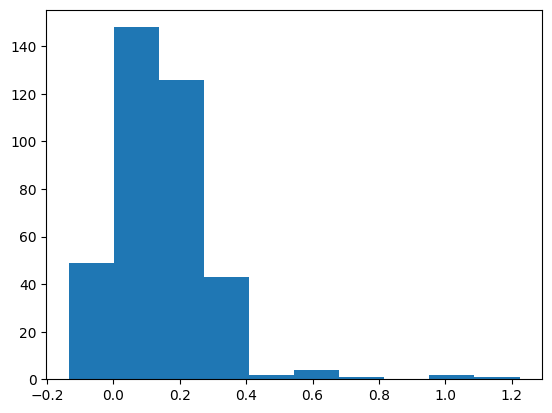

In [ ]:
plt.hist(df_final['Log(M/Ms)'])

(array([364.,   5.,   3.,   1.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0.73316209,  2.33363215,  3.9341022 ,  5.53457226,  7.13504232,
         8.73551237, 10.33598243, 11.93645249, 13.53692255, 15.1373926 ,
        16.73786266]),
 <BarContainer object of 10 artists>)

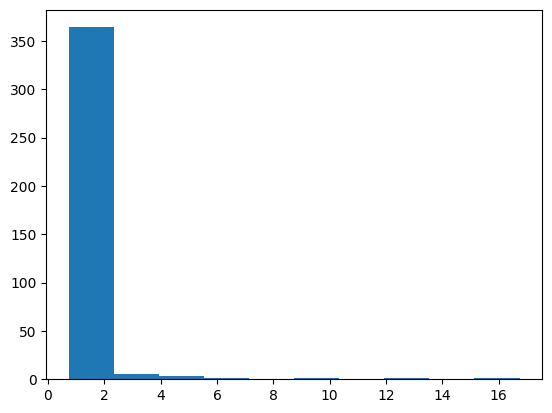

In [ ]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [ ]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [ ]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
32,0.008,-3.263,9.965,NaN,0.172
33,0.008,-2.485,9.830,0.172,0.398
34,0.008,-2.817,9.962,0.398,0.623
35,0.008,-2.226,9.594,0.623,0.849
36,0.008,-1.831,9.258,0.849,1.074
37,0.008,-1.354,8.746,1.074,1.300
38,0.008,-0.908,8.166,1.300,1.525
39,0.008,-0.801,8.004,1.525,NaN


In [ ]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] :
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [ ]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.485   b: 9.83


In [ ]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.144

In [ ]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200,0.06313,1.156458,9.759007,5.741255e+09
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120,0.06152,1.152179,9.764260,5.811125e+09
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200,0.05025,1.122665,9.801034,6.324617e+09
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110,0.05830,1.143668,9.774767,5.953428e+09
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340,-0.03040,0.932395,10.064195,1.159298e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068,-0.09376,0.805824,10.270939,1.866117e+10
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.12220,0.754745,10.363739,2.310674e+10
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.99278,9.835128,7.440220,2.755623e+07
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.77806,5.998739,7.862038,7.278442e+07


(array([  2.,   1.,   1.,   4.,   2.,  24., 111., 118.,  82.,  31.]),
 array([ 7.0891102 ,  7.42068442,  7.75225864,  8.08383286,  8.41540708,
         8.7469813 ,  9.07855552,  9.41012974,  9.74170396, 10.07327818,
        10.4048524 ]),
 <BarContainer object of 10 artists>)

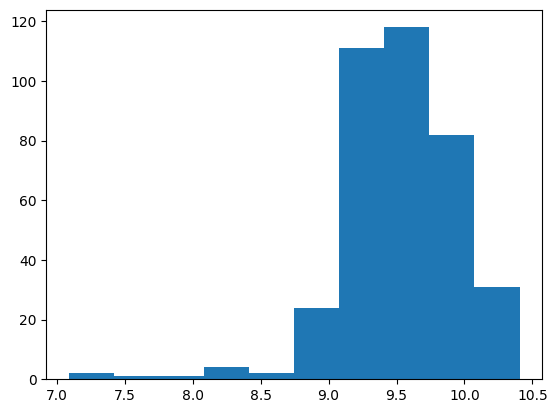

In [ ]:
plt.hist(df_final['Log(t)'])

(array([144., 107.,  56.,  30.,  11.,   8.,   3.,   8.,   6.,   3.]),
 array([1.22775073e+07, 2.55115903e+09, 5.09004055e+09, 7.62892208e+09,
        1.01678036e+10, 1.27066851e+10, 1.52455666e+10, 1.77844482e+10,
        2.03233297e+10, 2.28622112e+10, 2.54010927e+10]),
 <BarContainer object of 10 artists>)

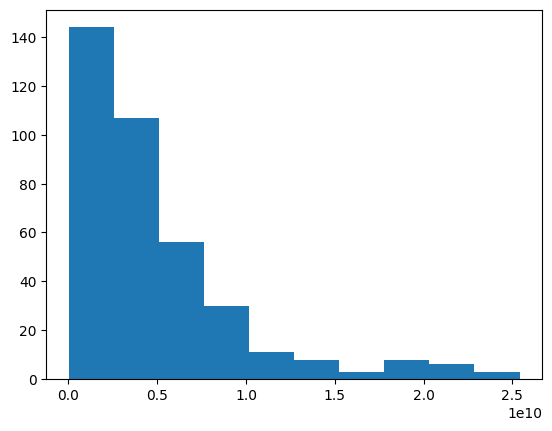

In [ ]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [ ]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [ ]:
Mass_Pulsation

,Z,I,a,b,c,D
48,0.008,1,7.386,0.375,0.676,-10.0
49,0.008,2,0.637,0.695,0.088,0.0
50,0.008,3,7.380,1.538,0.289,0.0
51,0.008,4,5.073,1.133,0.261,0.0


In [ ]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D

In [ ]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 0.637   b: 0.695  c: 0.088  D: -10.0


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [ ]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)

  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [ ]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,10870.00,296.178920,-14.822860,17.320,16.120,S,0.055301,1.200,0.06313,1.156458,9.759007,5.741255e+09,5.729002,535798.859121
1,10784.00,296.215450,-14.834690,17.250,16.130,S,0.036084,1.120,0.06152,1.152179,9.764260,5.811125e+09,5.721117,526158.434295
2,11004.00,296.273410,-14.808610,17.400,16.200,S,0.043961,1.200,0.05025,1.122665,9.801034,6.324617e+09,5.664863,462235.143510
3,11029.00,296.283080,-14.804970,17.260,16.150,S,0.053182,1.110,0.05830,1.143668,9.774767,5.953428e+09,5.705231,507260.313111
4,12050.00,296.254270,-14.817640,17.970,16.630,S,0.029053,1.340,-0.03040,0.932395,10.064195,1.159298e+10,5.219062,165600.601754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,89.99,295.976105,-14.796489,18.050,16.982,C,0.253948,1.068,-0.09376,0.805824,10.270939,1.866117e+10,4.837400,68770.089998
372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.12220,0.754745,10.363739,2.310674e+10,4.663767,46107.054074
373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.99278,9.835128,7.440220,2.755623e+07,4.655488,45236.421059
374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.77806,5.998739,7.862038,7.278442e+07,4.105127,12738.764673


(array([  1.,   0.,  13.,   8.,  20.,  28.,  32.,  77.,  63., 134.]),
 array([4.10512731, 4.33265616, 4.560185  , 4.78771384, 5.01524269,
        5.24277153, 5.47030037, 5.69782922, 5.92535806, 6.1528869 ,
        6.38041575]),
 <BarContainer object of 10 artists>)

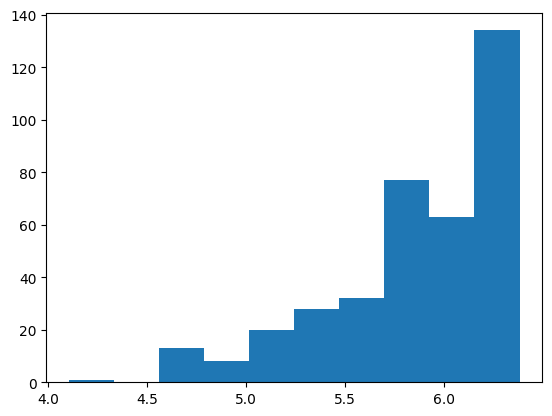

In [ ]:
plt.hist(df_final['Log(dt)'])

(array([57., 45., 60., 35., 20., 26., 19., 28., 33., 53.]),
 array([  12738.76467309,  251577.92821976,  490417.09176643,
         729256.2553131 ,  968095.41885977, 1206934.58240644,
        1445773.74595311, 1684612.90949978, 1923452.07304645,
        2162291.23659312, 2401130.40013979]),
 <BarContainer object of 10 artists>)

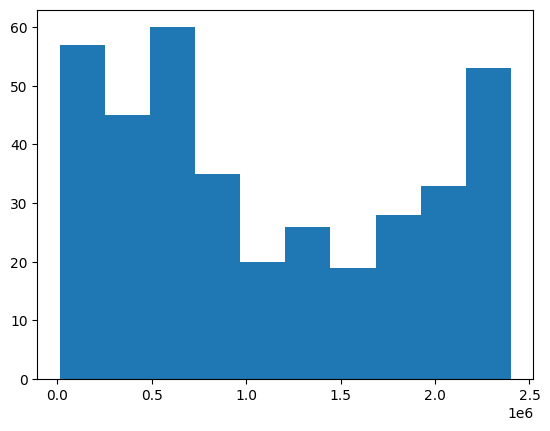

In [ ]:
plt.hist(df_final['dt'])

## Data Saving

In [ ]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)